In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [4]:
data = pd.read_csv('data/210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv') #read csv data
#csv data has been downloaded from https://www.opengov-muenchen.de/dataset/monatszahlen-verkehrsunfaelle/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7

This is “Monatszahlen Verkehrsunfälle” ("Monthly figures for traffic accidents") data for Munich. The data has been downloaded from [München Open Data Portal](https://www.opengov-muenchen.de/dataset/monatszahlen-verkehrsunfaelle/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7). This data consists of the number of accidents for specific categories per month. First 5 columns are important :  
- Monatszahl (Category) : The unique values in this column are 
    1. Alkoholunfälle (Alcohol accidents)
    2. Fluchtunfälle (Escape accidents)
    3. Verkehrsunfälle (Traffic accidents)
- AUSPRAEGUNG (Accident type) : The unique values in this column are
    1. insgesamt (total for all subcategories)
    2. Verletzte und Getötete (Injured and killed)
    3. mit Personenschäden (with personal injury)
- Jahr (Year)
- Monat (Month)
- Wert (Value)

In [5]:
data = data.iloc[:,0:5] #taking first five columns
data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN
...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [6]:
data['AUSPRAEGUNG'].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [7]:
data['MONATSZAHL'].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [8]:
columns = ['Category','AccidentType','Year','Month','Value']
data.columns = columns #Renaming the columns
data.head()

,Category,AccidentType,Year,Month,Value
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN


In [9]:
data.info() #for 2021 the Values are NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1995 non-null   object 
 1   AccidentType  1995 non-null   object 
 2   Year          1995 non-null   int64  
 3   Month         1995 non-null   object 
 4   Value         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


In [10]:
#data[data['Year'] == 2021] #for 2021 the Values are NaN

In [11]:
data.describe() #the dataset consists of values from 2000 to 2020 . 2021 data is NaN

,Year,Value
count,1995.000000,1911.000000
mean,2010.463158,1440.540031
std,6.326381,4655.514611
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2010.000000,399.000000
75%,2016.000000,864.000000
max,2021.000000,46988.000000


In [12]:
data.isna().sum() #checking for null values

Category         0
AccidentType     0
Year             0
Month            0
Value           84
dtype: int64

In [13]:
data = data.dropna(axis=0, how='any') #dropping 2021
data.describe()

,Year,Value
count,1911.000000,1911.000000
mean,2010.000000,1440.540031
std,6.056886,4655.514611
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2010.000000,399.000000
75%,2015.000000,864.000000
max,2020.000000,46988.000000


In [14]:
data.isna().sum() #checking for null values

Category        0
AccidentType    0
Year            0
Month           0
Value           0
dtype: int64

In [15]:
data_monthly = data[data['Month']!='Summe'] #dropping rows of sum of accidents for every year
data_yearly = data[data['Month']=='Summe'] # sum of accidents for every year

In [16]:
data_yearly

,Category,AccidentType,Year,Month,Value
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
25,Alkoholunfälle,insgesamt,2019,Summe,434.0
38,Alkoholunfälle,insgesamt,2018,Summe,398.0
51,Alkoholunfälle,insgesamt,2017,Summe,409.0
64,Alkoholunfälle,insgesamt,2016,Summe,301.0
...,...,...,...,...,...
1930,Verkehrsunfälle,Verletzte und Getötete,2004,Summe,6219.0
1943,Verkehrsunfälle,Verletzte und Getötete,2003,Summe,6365.0
1956,Verkehrsunfälle,Verletzte und Getötete,2002,Summe,7026.0
1969,Verkehrsunfälle,Verletzte und Getötete,2001,Summe,7452.0


In [17]:
#data_yearly.groupby(['Category','Year']).Value.sum().unstack().T

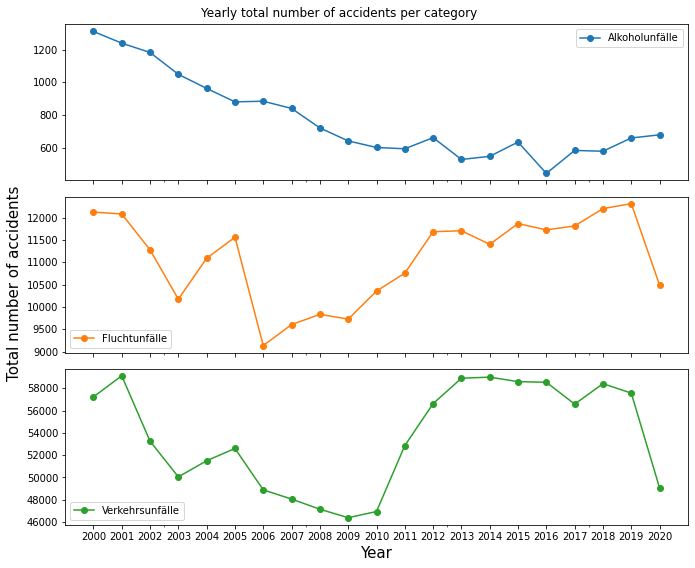

In [18]:
ax = data_yearly.groupby(['Category','Year']).Value.sum().unstack().T.plot(figsize=(10,8),subplots=True,marker='o',
                                                                                         title='Yearly total number of accidents per category');
fig=ax[0].figure
fig.text(0.05,0.5, "Total number of accidents", ha="center", va="center", rotation=90, fontsize=15)
#fig.text(0.5,0.04, "Year", ha="center", va="center", fontsize=)
plt.xlabel("Year", fontsize=15)
plt.xticks(np.arange(2000,2021,1));
plt.tight_layout();
plt.subplots_adjust(top=0.95);
plt.subplots_adjust(left=0.12);
#plt.title('Yearly total number of accidents per category')
plt.savefig('figures/Yearly total number of accidents per category.pdf',dpi=1000);

In [19]:
#data_yearly.groupby(['Category','AccidentType','Year']).Value.sum().unstack().T

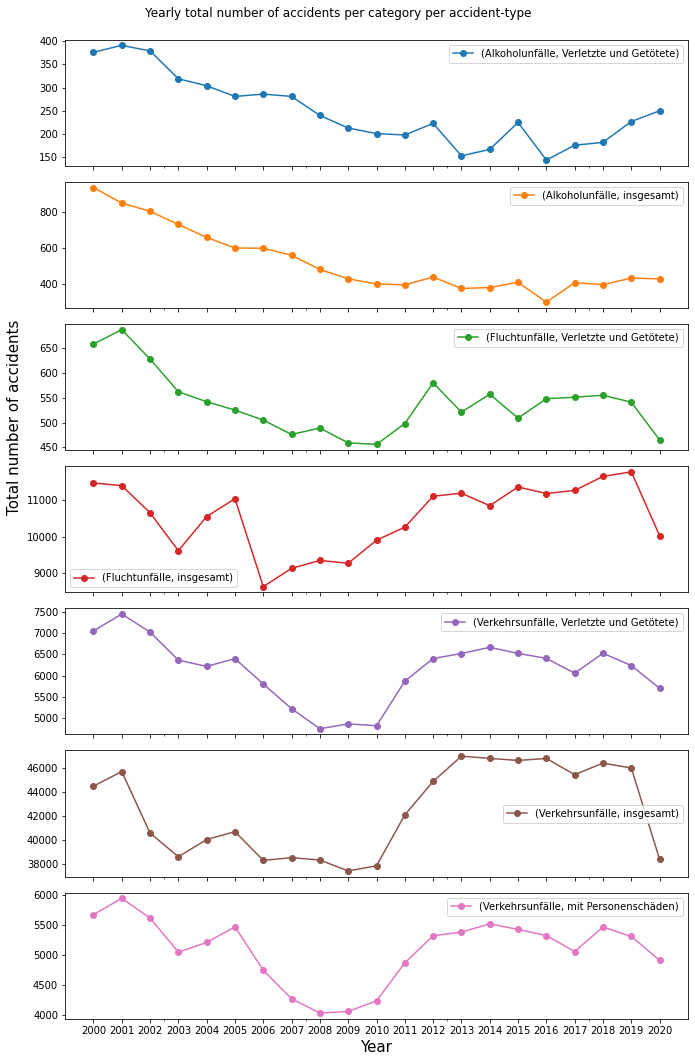

In [20]:
ax = data_yearly.groupby(['Category','AccidentType','Year']).Value.sum().unstack().T.plot(figsize=(10,15),subplots=True,marker='o',
                                                                                         title='Yearly total number of accidents per category per accident-type');
fig=ax[0].figure
fig.text(0.05,0.6, "Total number of accidents", ha="center", va="center", rotation=90, fontsize=15)
#fig.text(0.5,0.04, "Year", ha="center", va="center", fontsize=)
plt.xlabel("Year", fontsize=15)
plt.xticks(np.arange(2000,2021,1));
plt.tight_layout();
plt.subplots_adjust(top=0.95);
plt.subplots_adjust(left=0.12);
#plt.title('Yearly total number of accidents per category')
plt.savefig('figures/Yearly total number of accidents per category per accidenttype.pdf',dpi=1000);

In [21]:
data_monthly

,Category,AccidentType,Year,Month,Value
13,Alkoholunfälle,insgesamt,2020,202001,28.0
14,Alkoholunfälle,insgesamt,2020,202002,40.0
15,Alkoholunfälle,insgesamt,2020,202003,27.0
16,Alkoholunfälle,insgesamt,2020,202004,26.0
17,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [22]:
df = data_monthly.groupby(['Category','Month']).Value.sum().unstack().T
# Converting the index as date
df.index = pd.to_datetime(df.index,format='%Y%m')

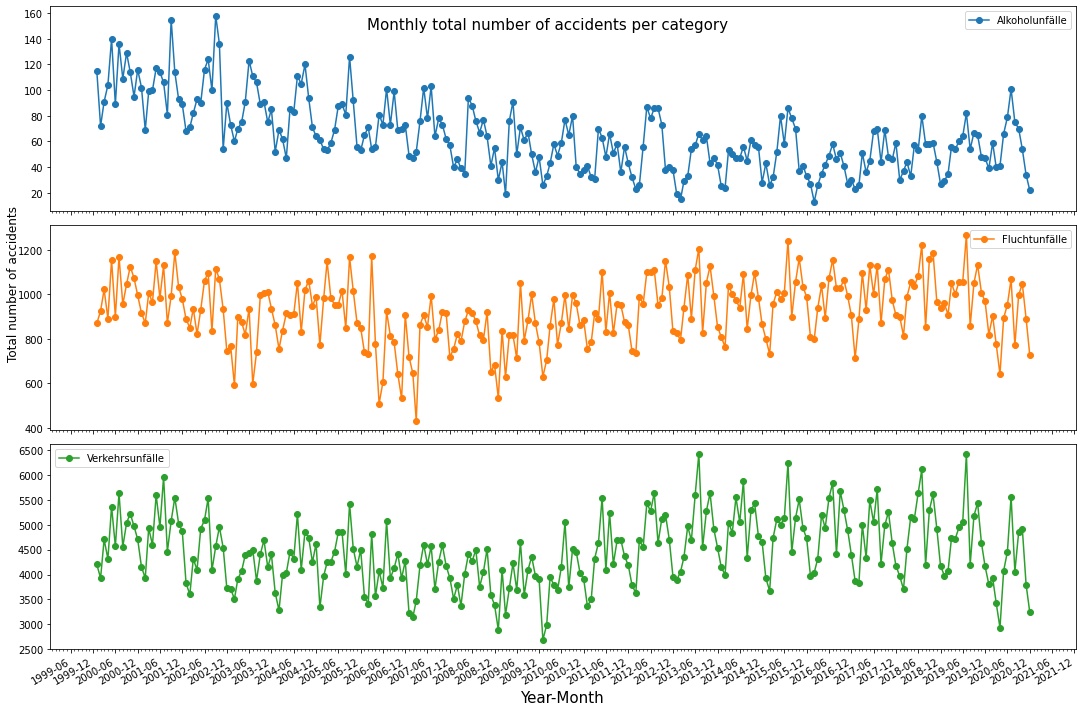

In [23]:
ax = df.plot(figsize=(15,10),subplots=True,marker='o',x_compat=True)#, title="Monthly total number of accidents per category");
fig=ax[0].figure
fig.text(0.006,0.6, "Total number of accidents", ha="center", va="center", rotation=90, fontsize=12)
fig.text(0.5,0.96, "Monthly total number of accidents per category", ha="center", va="center", rotation=0, fontsize=15)

fmt_half_year = mdates.MonthLocator(interval=6)
ax[-1].xaxis.set_major_locator(fmt_half_year);
# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax[-1].xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel("Year-Month", fontsize=15);
plt.subplots_adjust(top=0.5);
plt.subplots_adjust(left=0.12);
plt.tight_layout()
plt.savefig('figures/Monthly total number of accidents per category.pdf',dpi=1000);
#ax[6].xaxis.set_major_locator(mdates.MonthLocator())

In [24]:
df = data_monthly.groupby(['Category','AccidentType','Month']).Value.sum().unstack().T
# Converting the index as date
df.index = pd.to_datetime(df.index,format='%Y%m')

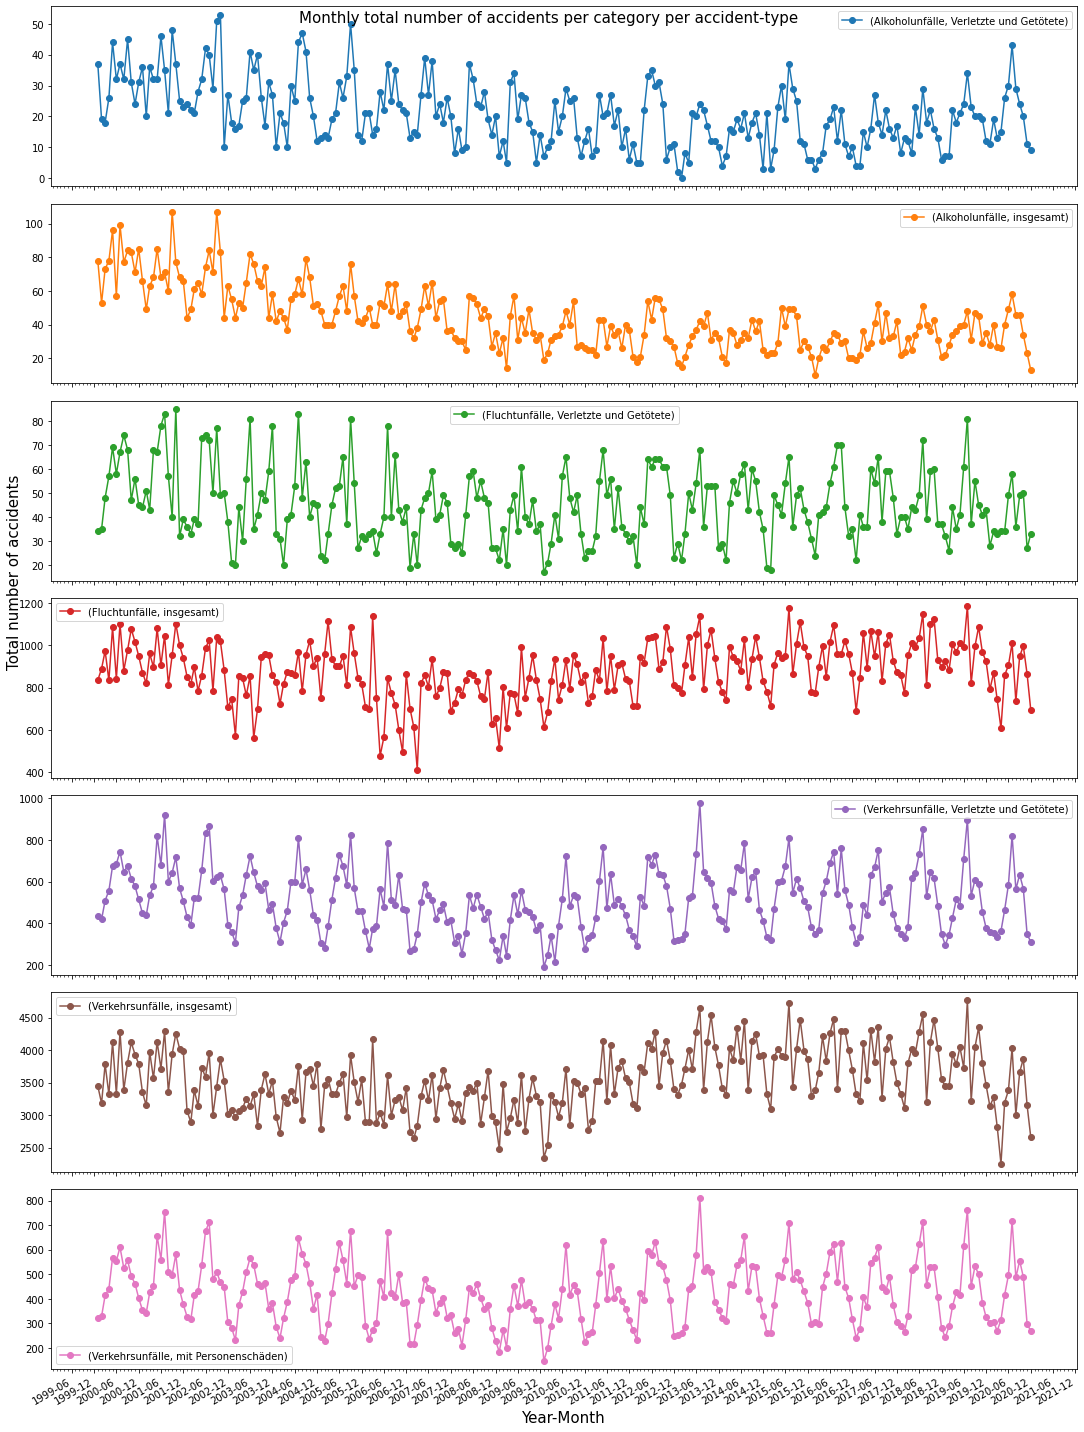

In [25]:
ax = df.plot(figsize=(15,20),subplots=True,marker='o',x_compat=True);
fig=ax[0].figure
fig.text(0.006,0.6, "Total number of accidents", ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.5,0.985, "Monthly total number of accidents per category per accident-type", ha="center", va="center", rotation=0, fontsize=15)

fmt_half_year = mdates.MonthLocator(interval=6)
ax[-1].xaxis.set_major_locator(fmt_half_year);
# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax[-1].xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel("Year-Month", fontsize=15);
plt.subplots_adjust(top=0.5);
plt.subplots_adjust(left=0.12);
plt.tight_layout()
plt.savefig('figures/Monthly total number of accidents per category per accidenttype.pdf',dpi=1000);
#ax[6].xaxis.set_major_locator(mdates.MonthLocator())

In [26]:
df

Category             Alkoholunfälle                    Fluchtunfälle  \
AccidentType Verletzte und Getötete insgesamt Verletzte und Getötete   
Month                                                                  
2000-01-01                     37.0      78.0                   34.0   
2000-02-01                     19.0      53.0                   35.0   
2000-03-01                     18.0      73.0                   48.0   
2000-04-01                     26.0      78.0                   57.0   
2000-05-01                     44.0      96.0                   69.0   
...                             ...       ...                    ...   
2020-08-01                     29.0      46.0                   36.0   
2020-09-01                     24.0      46.0                   49.0   
2020-10-01                     20.0      34.0                   50.0   
2020-11-01                     11.0      23.0                   27.0   
2020-12-01                      9.0      13.0                   33.0   

Category                      Verkehrsunfälle                                
AccidentType insgesamt Verletzte und Getötete insgesamt mit Personenschäden  
Month                                                                        
2000-01-01       835.0                  434.0    3448.0               321.0  
2000-02-01       890.0                  419.0    3181.0               329.0  
2000-03-01       974.0                  509.0    3783.0               414.0  
2000-04-01       834.0                  557.0    3317.0               441.0  
2000-05-01      1086.0                  675.0    4123.0               568.0  
...                ...                    ...       ...                 ...  
2020-08-01       735.0                  563.0    3007.0               487.0  
2020-09-01       948.0                  634.0    3659.0               555.0  
2020-10-01       997.0                  566.0    3867.0               489.0  
2020-11-01       864.0                  348.0    3150.0               297.0  
2020-12-01       694.0                  311.0    2661.0               270.0  

[252 rows x 7 columns]

In [27]:
alcohol_insgesamt = pd.DataFrame(df['Alkoholunfälle']['insgesamt'])

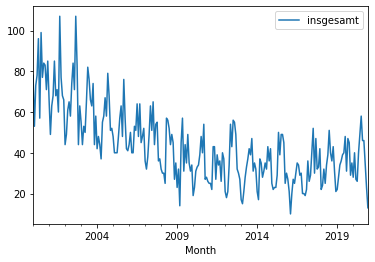

In [28]:
alcohol_insgesamt.plot();

In [29]:
alcohol_insgesamt

,insgesamt
Month,
2000-01-01,78.0
2000-02-01,53.0
2000-03-01,73.0
2000-04-01,78.0
2000-05-01,96.0
...,...
2020-08-01,46.0
2020-09-01,46.0
2020-10-01,34.0


In [30]:
df_alc = alcohol_insgesamt

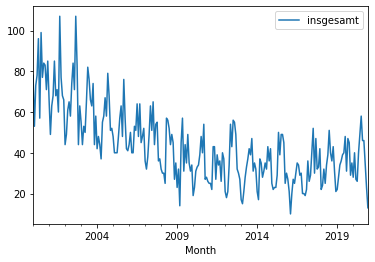

In [31]:
df_alc.plot();

In [32]:
### Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [33]:
test_result = adfuller(df_alc['insgesamt'])

In [34]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adfuller_test(df_alc['insgesamt'])

ADF Test Statistic : -2.778474040626486
p-value : 0.06141499421706883
#Lags Used : 13
Number of Observations Used : 238
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [36]:
df_alc['First difference'] = df_alc['insgesamt'] - df_alc['insgesamt'].shift(1)

In [37]:
df_alc

,insgesamt,First difference
Month,,
2000-01-01,78.0,NaN
2000-02-01,53.0,-25.0
2000-03-01,73.0,20.0
2000-04-01,78.0,5.0
2000-05-01,96.0,18.0
...,...,...
2020-08-01,46.0,-12.0
2020-09-01,46.0,0.0
2020-10-01,34.0,-12.0


In [38]:
df_alc['Seasonal first difference'] = df_alc['insgesamt'] - df_alc['insgesamt'].shift(12)

In [39]:
df_alc

,insgesamt,First difference,Seasonal first difference
Month,,,
2000-01-01,78.0,NaN,NaN
2000-02-01,53.0,-25.0,NaN
2000-03-01,73.0,20.0,NaN
2000-04-01,78.0,5.0,NaN
2000-05-01,96.0,18.0,NaN
...,...,...,...
2020-08-01,46.0,-12.0,15.0
2020-09-01,46.0,0.0,-1.0
2020-10-01,34.0,-12.0,-11.0


In [40]:
# Again test dickey fuller test
adfuller_test(df_alc['Seasonal first difference'].dropna())

ADF Test Statistic : -3.358728737351923
p-value : 0.012448890266151754
#Lags Used : 15
Number of Observations Used : 224
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


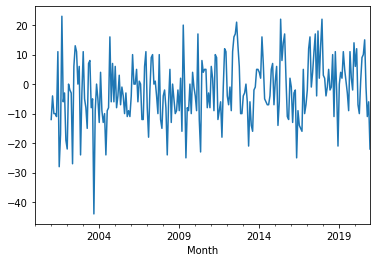

In [41]:
df_alc['Seasonal first difference'].plot();

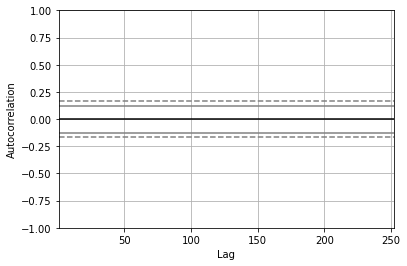

In [42]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_alc['Seasonal first difference'])
plt.show()

In [43]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

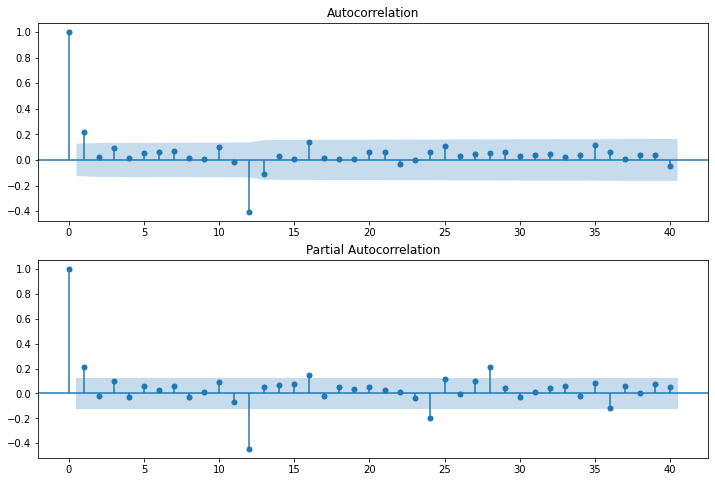

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_alc['Seasonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_alc['Seasonal first difference'].iloc[13:],lags=40,ax=ax2)

In [45]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model=ARIMA(df_alc['insgesamt'],order=(1,1,1))
model_fit=model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.insgesamt   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -959.779
Method:                       css-mle   S.D. of innovations             11.045
Date:                Mon, 18 Oct 2021   AIC                           1927.559
Time:                        15:49:55   BIC                           1941.660
Sample:                    02-01-2000   HQIC                          1933.233
                         - 12-01-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1695      0.069     -2.457      0.014      -0.305      -0.034
ar.L1.D.insgesamt     0.4011      0.063      6.368      0.000       0.278       0.524
ma.L1.D.insgesamt    -0.9448      0.018    -52.888      0.000      -0.980      -0.910
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4934           +0.0000j            2.4934            0.0000
MA.1            1.0585           +0.0000j            1.0585            0.0000
-----------------------------------------------------------------------------
"""

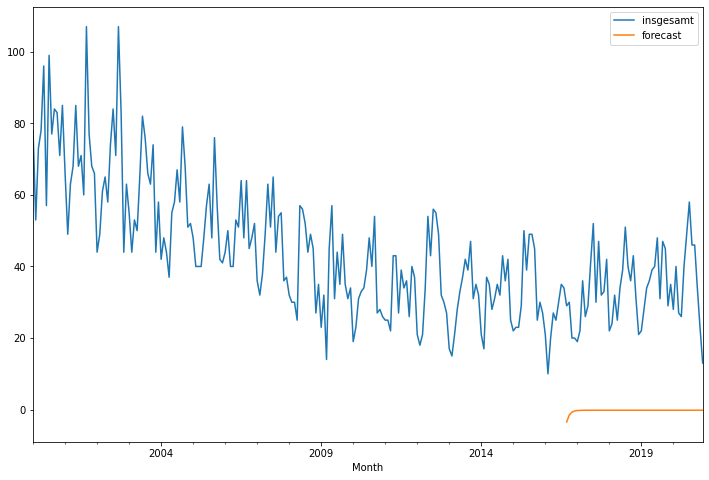

In [48]:
df_alc['forecast']=model_fit.predict(start=200,end=252,dynamic=True)
df_alc[['insgesamt','forecast']].plot(figsize=(12,8));

In [49]:
model=sm.tsa.statespace.SARIMAX(df_alc['insgesamt'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


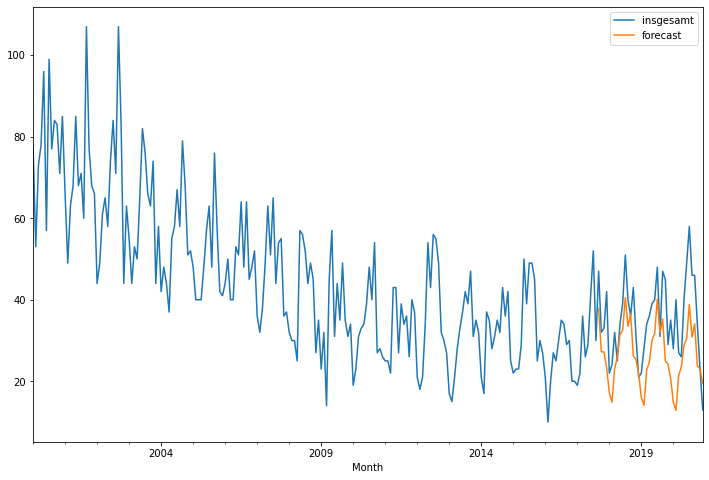

In [50]:
df_alc['forecast']=results.predict(start=212,end=252,dynamic=True)
df_alc[['insgesamt','forecast']].plot(figsize=(12,8));

In [51]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [52]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df_alc.columns)

In [53]:
future_datest_df

,insgesamt,First difference,Seasonal first difference,forecast
2021-01-01,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN


In [54]:
future_df = pd.concat([df_alc, future_datest_df])

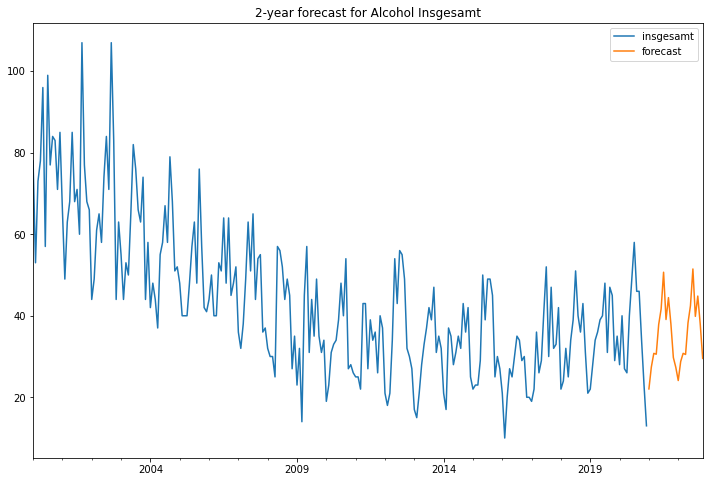

In [66]:
future_df['forecast'] = results.predict(start = 252, end = 274, dynamic=True)
future_df[['insgesamt', 'forecast']].plot(figsize=(12,8), title='2-year forecast for Alcohol Insgesamt');
plt.savefig('figures/Forecast_2year_alcoholinsgesamt.pdf',dpi=1000);

In [67]:
future_df.loc['2021-01-01':]

,insgesamt,First difference,Seasonal first difference,forecast
2021-01-01,NaN,NaN,NaN,22.048068
2021-02-01,NaN,NaN,NaN,27.438504
2021-03-01,NaN,NaN,NaN,30.766734
2021-04-01,NaN,NaN,NaN,30.568512
2021-05-01,NaN,NaN,NaN,37.855028
2021-06-01,NaN,NaN,NaN,41.668237
2021-07-01,NaN,NaN,NaN,50.681486
2021-08-01,NaN,NaN,NaN,39.083181
2021-09-01,NaN,NaN,NaN,44.452926
2021-10-01,NaN,NaN,NaN,37.986738


In [68]:
future_df

,insgesamt,First difference,Seasonal first difference,forecast
2000-01-01,78.0,NaN,NaN,NaN
2000-02-01,53.0,-25.0,NaN,NaN
2000-03-01,73.0,20.0,NaN,NaN
2000-04-01,78.0,5.0,NaN,NaN
2000-05-01,96.0,18.0,NaN,NaN
...,...,...,...,...
2022-07-01,NaN,NaN,NaN,51.479631
2022-08-01,NaN,NaN,NaN,39.852204
2022-09-01,NaN,NaN,NaN,44.832685
2022-10-01,NaN,NaN,NaN,37.965339


In [82]:
future_df.to_pickle('forecast_ARIMA.pkl')

In [70]:
import flask
import jsonify

In [71]:
import requests

In [72]:
pip install session-info

Note: you may need to restart the kernel to use updated packages.


In [73]:
import session_info
session_info.show()

In [84]:
year = 2021
month = 1
date = str(year) + '-' + str(month)
date

'2021-1'

In [85]:
date = pd.to_datetime(date, format='%Y-%m')

In [86]:
future_df.loc[date]['forecast']

22.048067501165665